# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_of_mice = len(combined_data["Mouse ID"].unique())
print(f"Number of mice in the study: {number_of_mice}")

Number of mice in the study: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dup_mice = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
dup_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
dup_mice_rows = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]
dup_mice_rows.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = len(clean_data["Mouse ID"].unique())
print(f"Number of mice in clean dataframe: {clean_mice_count}")

Number of mice in clean dataframe: 249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).mean()
median = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).median()
var = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).var()
std = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).std()
sem = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).sem()
# Assemble the resulting series into a single summary DataFrame.
sum_stat = pd.DataFrame({"Mean":mean,"Median":median, "Variance":var, "Std. Dev.":std, "Std. Err.":sem})
sum_stat

,Mean,Median,Variance,Std. Dev.,Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
agg_grouped = combined_data.groupby("Drug Regimen")
agg_data = pd.DataFrame({"Mean":mean,"Median":median, "Variance":var, "Std. Dev.":std, "Std. Err.":sem})
agg_data

,Mean,Median,Variance,Std. Dev.,Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
mice_per_drug = combined_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
mice_per_drug

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

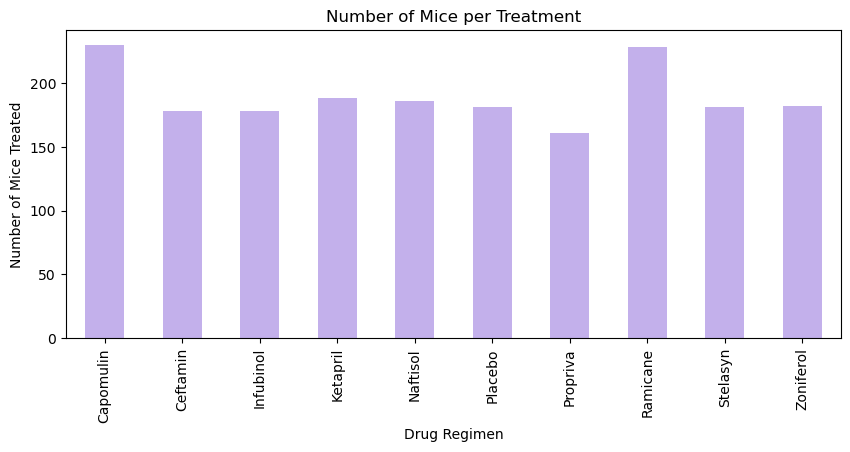

<Figure size 640x480 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
fig1 = mice_per_drug.plot(kind="bar", color="mediumpurple", figsize=(10,4), fontsize = 10, alpha = .55)
plt.title("Number of Mice per Treatment",fontsize = 12)
plt.xlabel("Drug Regimen",fontsize = 10)
plt.ylabel("Number of Mice Treated",fontsize = 10)

plt.savefig("Images/pandas_bar_mice_per_treat.png")
plt.show()
plt.tight_layout()

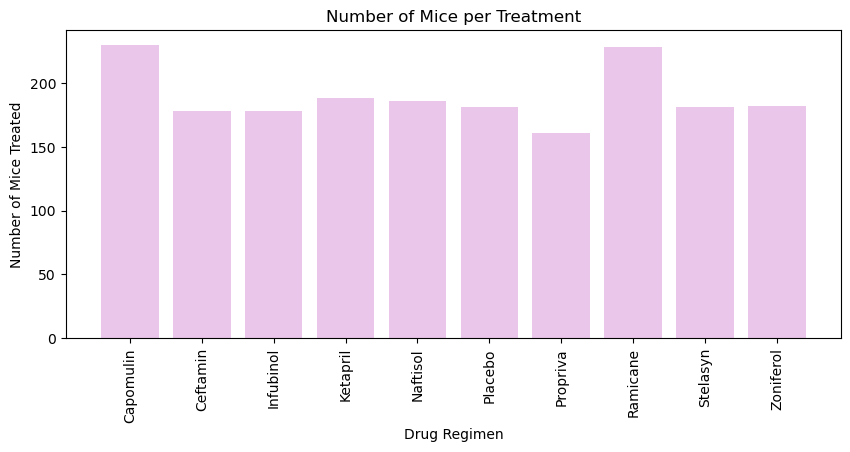

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
treatment_count = (combined_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()

x_axis = np.arange(len(mice_per_drug))
tick_locations = [x for x in x_axis]
plt.figure(figsize=(10,4))


plt.xticks(tick_locations, mice_per_drug.index.values, rotation="vertical")
plt.bar(x_axis, treatment_count, color="plum", alpha=.60, align="center")
plt.title("Number of Mice per Treatment",fontsize = 12)
plt.xlabel("Drug Regimen",fontsize = 10)
plt.ylabel("Number of Mice Treated",fontsize = 10)
plt.savefig("Images/pyplot_bar_mice_per_treat.png")

In [27]:
gender_group = combined_data.groupby(["Mouse ID", "Sex"])
gender_df = pd.DataFrame(gender_group.size())

mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


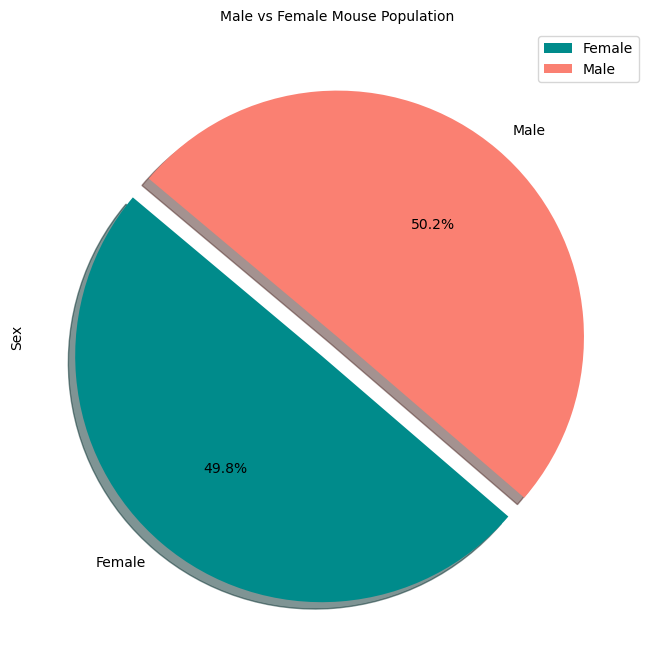

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Total count of mice based on gender
# Create a dataframe for count and percentage of male and female mice
# Generate a pie plot showing the distribution of female versus male mice
colors = ["darkcyan", "salmon"]
explode = (0.1, 0)

plot = mouse_gender.plot.pie(y="Total Count",figsize=(10,8), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")
plt.title("Male vs Female Mouse Population",fontsize = 10)
plt.ylabel("Sex",fontsize = 10)

plt.savefig("Images/pandas_pie_male_vs_female.png")
plt.show()

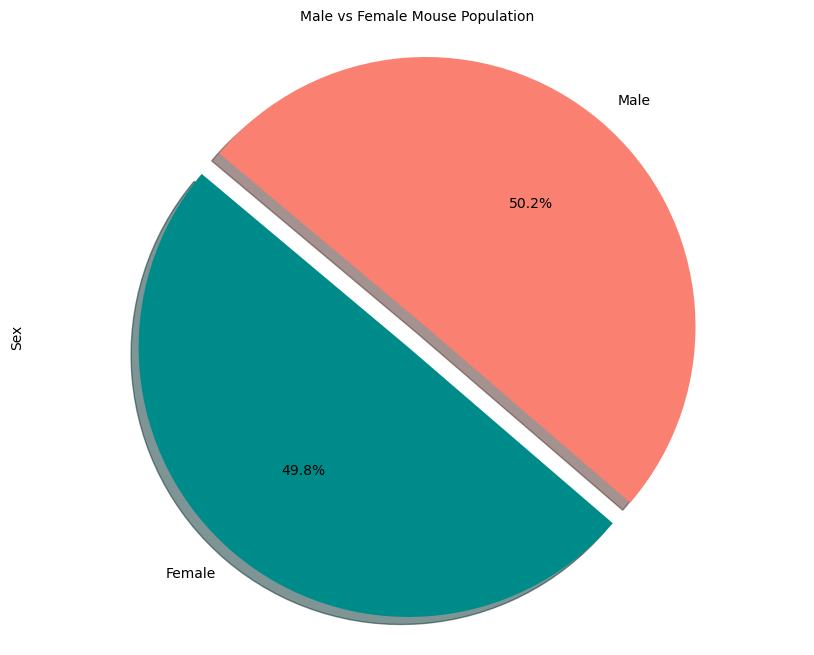

In [36]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
labels = ["Female", "Male"]

sizes = [49.8, 50.2]

colors = ["darkcyan", "salmon"]
explode = (0.1, 0)

# Make the pie chart
fig1, ax1 = plt.subplots(figsize=(10, 8))
plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140,)
plt.title("Male vs Female Mouse Population",fontsize = 10)
plt.ylabel("Sex",fontsize = 10)
#Set equal axis
plt.axis("equal")

plt.savefig("Images/pyplot_male_vs_female.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [39]:
# Start by getting the last (greatest) timepoint for each mouse
max_point=clean_data.groupby(["Mouse ID"])["Timepoint"].max()
max_point 

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [40]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tx_df = pd.merge(max_point , clean_data, on=(["Mouse ID","Timepoint"]))
tx_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [69]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
Capomulin_df = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_data.loc[clean_data["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_data.loc[clean_data["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_data.loc[clean_data["Drug Regimen"] == "Ceftamin", :]

#empty list for vol data
tumor_vol_data = []

for treatment in treatments:
    tx_regimen = tx_df.loc[tx_df["Drug Regimen"] == treatment]
    tumor_vol= tx_regimen["Tumor Volume (mm3)"]
    
    tumor_vol_data.append(tumor_vol)

In [93]:
Capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [43]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    # Determine outliers using upper and lower bounds

quartile0 = tumor_vol_data[0].quantile([.25,.5,.75])
lowerq0 = quartile0[0.25]
upperq0 = quartile0[0.75]
IQR0 = upperq0-lowerq0

#repeating for each treatment type - basically copy and paste then fill in with data from those specified variables

quartile1 = tumor_vol_data[1].quantile([.25,.5,.75])
lowerq1 = quartile1[0.25]
upperq1 = quartile1[0.75]
IQR1 = upperq1-lowerq1

quartile2 = tumor_vol_data[2].quantile([.25,.5,.75])
lowerq2 = quartile2[0.25]
upperq2 = quartile2[0.75]
IQR2 = upperq2-lowerq2

quartile3 = tumor_vol_data[3].quantile([.25,.5,.75])
lowerq3 = quartile3[0.25]
upperq3 = quartile3[0.75]
IQR3 = upperq3-lowerq3
    
#Determine outliers using upper and lower bounds
lower_bound0 = lowerq0 - (1.5*IQR0)
upper_bound0 = upperq0 + (1.5*IQR0)

lower_bound1 = lowerq1 - (1.5*IQR1)
upper_bound1 = upperq1 + (1.5*IQR1)

lower_bound2 = lowerq2 - (1.5*IQR2)
upper_bound2 = upperq2 + (1.5*IQR2)

lower_bound3 = lowerq3 - (1.5*IQR3)
upper_bound3 = upperq3 + (1.5*IQR3)

#Print values 
print(f"For {treatments[0]} potential outliers are values below {lower_bound0} and above {upper_bound0}.")
print(f"For {treatments[1]} potential outliers are values below {lower_bound1} and above {upper_bound1}.")
print(f"For {treatments[2]} potential outliers are values below {lower_bound2} and above {upper_bound2}.")
print(f"For {treatments[3]} potential outliers are values below {lower_bound3} and above {upper_bound3}.")

For Capomulin potential outliers are values below 20.70456164999999 and above 51.83201549.
For Ramicane potential outliers are values below 17.912664470000003 and above 54.30681135.
For Infubinol potential outliers are values below 36.83290494999999 and above 82.74144559000001.
For Ceftamin potential outliers are values below 25.355449580000002 and above 87.66645829999999.


C:\Users\12182\AppData\Local\Temp\ipykernel_16048\841049433.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(tumor_vol_data, flierprops = flierprops, labels = treatments)


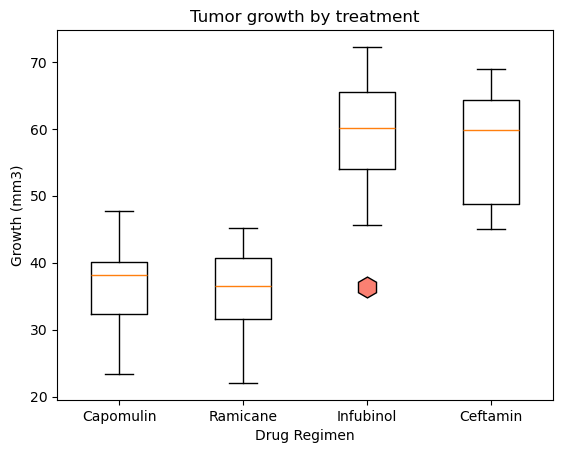

In [48]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
flierprops = dict(marker="h", markerfacecolor="salmon", markersize=15,
                  linestyle="none")
fig1, ax1 = plt.subplots()
ax1.set_title("Tumor growth by treatment")
ax1.set_ylabel("Growth (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(tumor_vol_data, flierprops = flierprops, labels = treatments)
plt.savefig("Images/box_plot.png")
plt.show()

## Line and Scatter Plots

In [51]:
#First I want to make a list of mice treated with Capomulin - setting up for line plot below
cap_mice = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
cap_mice.value_counts("Mouse ID")

Mouse ID
b128    10
b742    10
x401    10
w914    10
v923    10
u364    10
t565    10
s710    10
s185    10
r944    10
r554    10
m957    10
m601    10
l897    10
l509    10
j119    10
i738    10
i557    10
g316    10
g288    10
y793    10
j246     8
f966     5
r157     4
w150     3
Name: count, dtype: int64

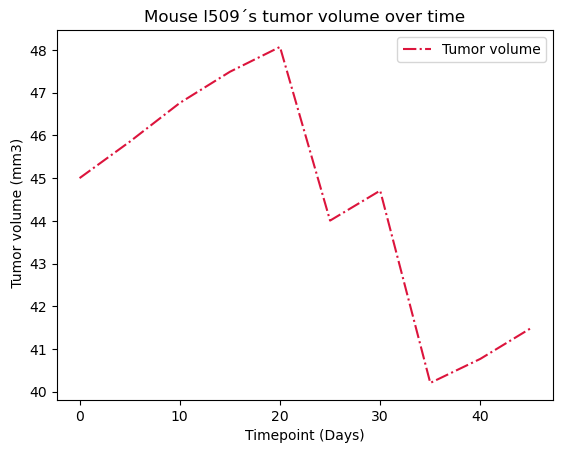

In [55]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Mouse_l509 = clean_data.loc[clean_data["Mouse ID"] == "l509"]
#Making a list of the mice that were only treated with 1509
y_axis_1509 = Mouse_l509["Tumor Volume (mm3)"]
x_axis_1509 = Mouse_l509["Timepoint"]

# Plot our line that will be used to 
plt.plot(x_axis_1509, y_axis_1509, color="crimson", label="Tumor volume", linestyle = "dashdot")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

#Give titles and labels to graph
plt.title( "Mouse l509´s tumor volume over time")
plt.xlabel("Timepoint (Days)")
plt.xticks(np.arange(min(x_axis_1509), max(x_axis_1509)+1, 10))
plt.ylabel(" Tumor volume (mm3)")

# Print our chart to the screen
plt.savefig("Images/lineplot.png")
plt.show()

In [119]:
Capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [118]:
capavg = Capomulin_df(["Mouse ID"]).count()
capavg

TypeError: 'DataFrame' object is not callable

In [114]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#fig1, ax1 = plt.subplots()
#marker_size=15
x_values = np.array(capm_vol['Weight (g)'])
y_values = np.array(capm_vol['Tumor Volume Mean'])

plt.scatter(x_values,y_values, color="blue")
plt.title("Mouse Weight Versus Average Tumor Volume")
plt.xlabel("Weight (g)",fontsize =14)
plt.ylabel("Averag Tumor Volume (mm3)")

KeyError: 'Weight (g)'

## Correlation and Regression

In [65]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
#(slope, intercept,rvalue, pvalue, stderr)= linregress(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
#regress_values=avg_capm_vol["Weight (g)"]* slope + intercept
#line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

#plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"],color="b")
#plt.plot(avg_capm_vol["Weight (g)"], regress_values, color="red")
#plt.annotate(line_eq,(20,36), fontsize=14)
#plt.xlabel("Weight (g)")
#plt.ylabel("Tumor Volume (mm3)")
#plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The correlation between mouse weight and the average tumor volume is (correlation).")
#plt.show()

NameError: name 'avg_capm_vol' is not defined